In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [2]:
bank = pd.read_csv('C:/Users/yoges/Desktop/bank-marketing.csv')
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.shape

(45211, 19)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [5]:
bank.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [6]:
bank.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bank.describe(include=object)

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,2,3,12,4,2
top,blue-collar,married,secondary,yes,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,37091,44396,25130,37967,29285,13766,36959,39922


# Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [8]:
bank.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [9]:
bank.pdays.median()

-1.0

# Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [10]:
bm1 = bank[bank['pdays']>0]
bm1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [11]:
bm1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [12]:
bm1.pdays.median()

194.0

After selecting values greater than 0 we can observe mean=224, minimum value=1 and median = 194.
This time mean and median has changed significantly because we have removed the case where pdays value is -1 ie we have removed the customer that were not contacted previously for campaign.

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

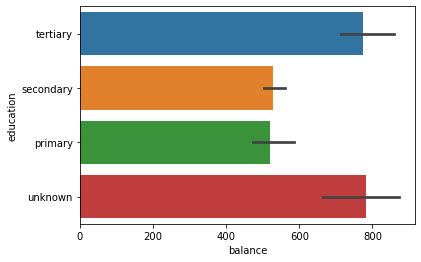

In [13]:
sns.barplot(x=bm1['balance'],y =bm1['education'],estimator=np.median)
plt.show()

In [14]:
bm1.groupby('education')['balance'].median()

education
primary      520.0
secondary    527.0
tertiary     775.0
unknown      782.0
Name: balance, dtype: float64

Thus, we can conclude from graph that customer with tertiary level of education has highest median value for balance.

# Make a box plot for pdays. Do you see any outliers?

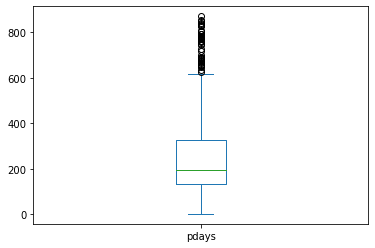

In [15]:
bm1.pdays.plot.box()
plt.show()

Yes, from the above box plot we can see that there are outliers present in pdays.

# The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”. So performing bi-variate analysis to identify the features that are directly associated with the target variable.

In [16]:
bm1.response.value_counts()

no     6352
yes    1905
Name: response, dtype: int64

In [17]:
bm1.replace({'response': {"yes": 1,'no':0}},inplace=True)

# Make suitable plots for associations with numerical features and categorical features’

In [18]:
obj_col = []
num_col = []
for col in bm1.columns:
    if bm1[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [19]:
print("Object data type features ",obj_col)
print("Numerical data type features ",num_col)

Object data type features  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical data type features  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


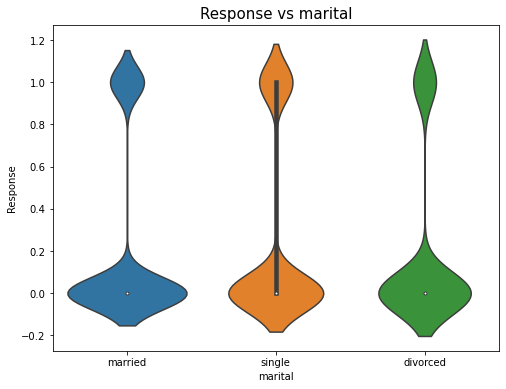

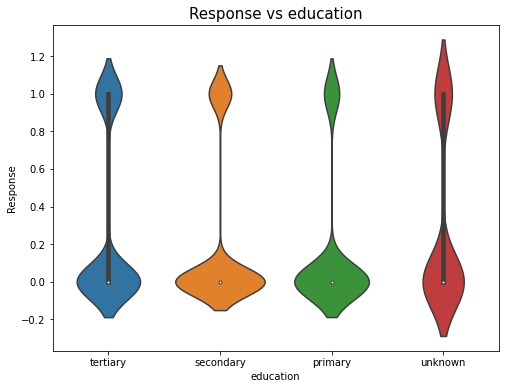

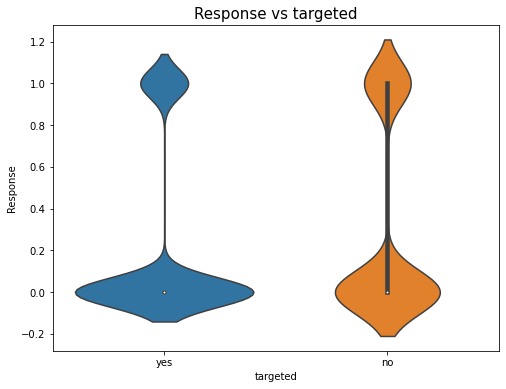

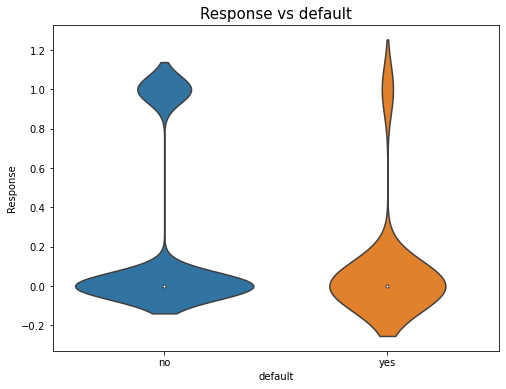

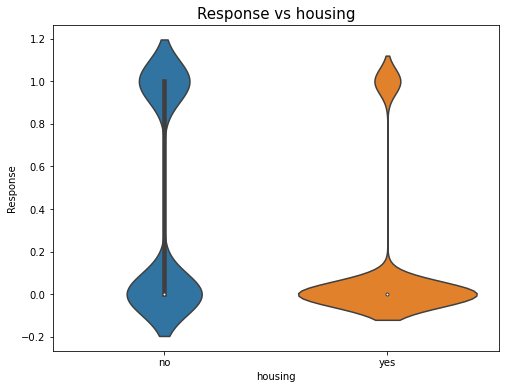

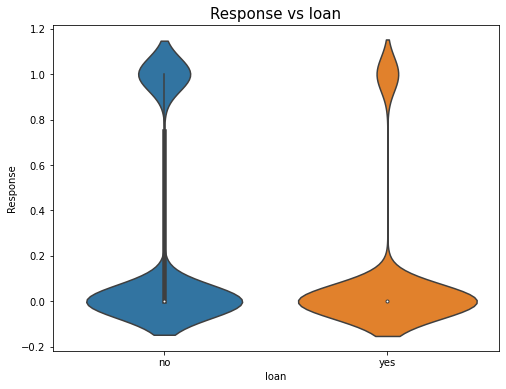

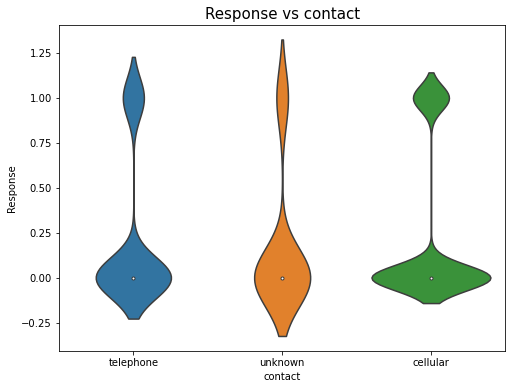

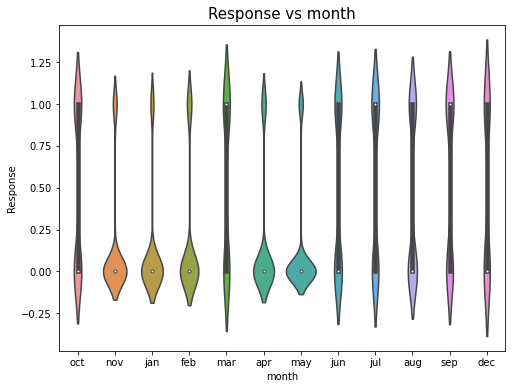

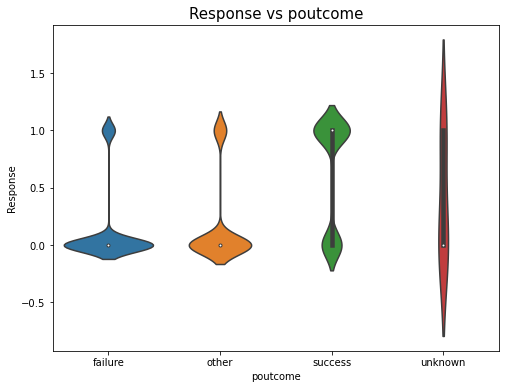

In [20]:
from numpy import median
for col in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(bm1[col],bm1["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

<Figure size 720x576 with 0 Axes>

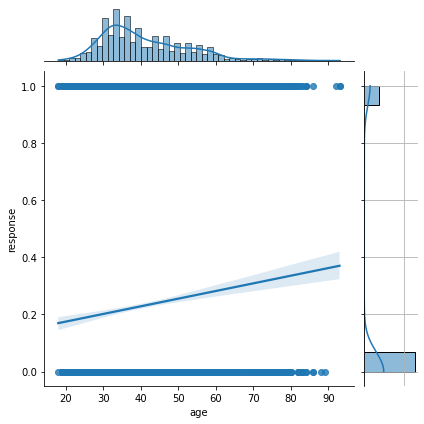

<Figure size 720x576 with 0 Axes>

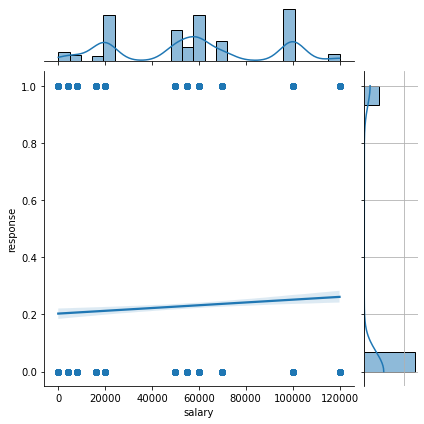

<Figure size 720x576 with 0 Axes>

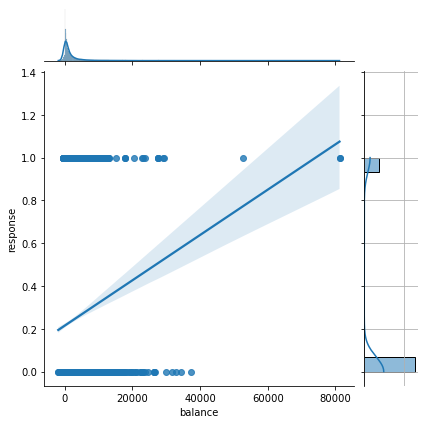

<Figure size 720x576 with 0 Axes>

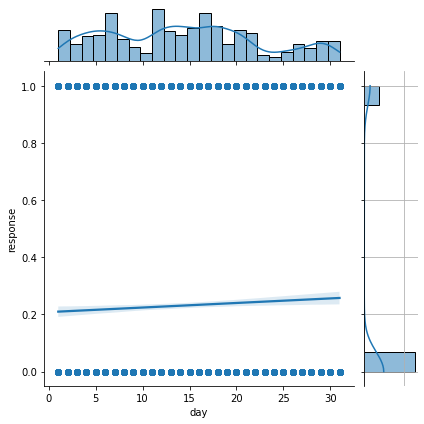

<Figure size 720x576 with 0 Axes>

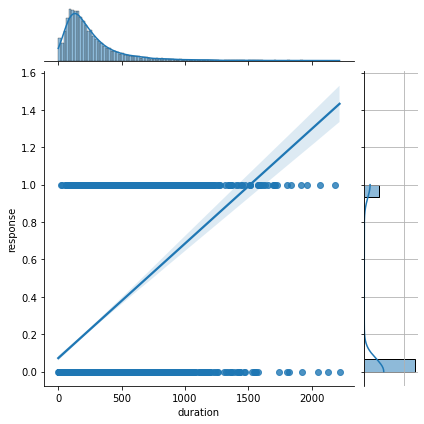

<Figure size 720x576 with 0 Axes>

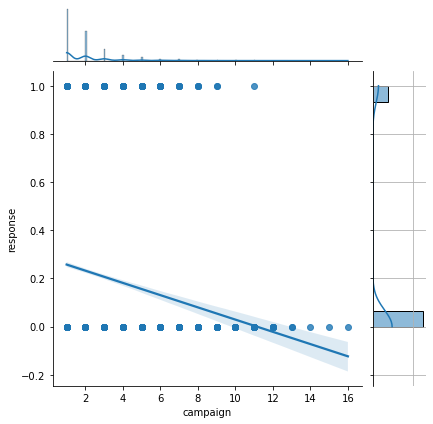

<Figure size 720x576 with 0 Axes>

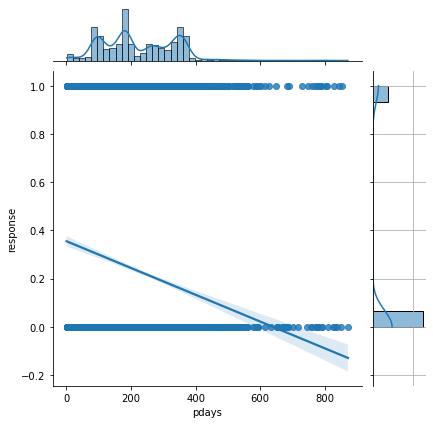

<Figure size 720x576 with 0 Axes>

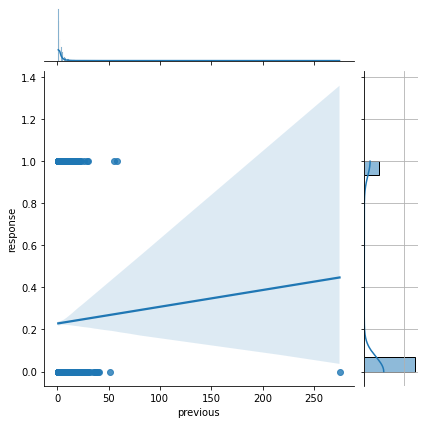

In [21]:
for col in num_col[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = bm1[col],y = bm1["response"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

<AxesSubplot:>

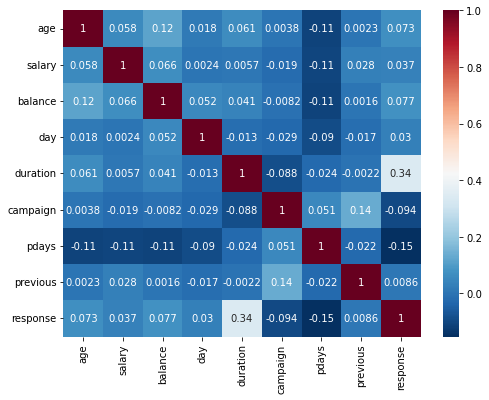

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(bm1.corr(),annot=True,cmap='RdBu_r')

we can see that duration variable is highly correlated with response variable 'Response Flag' . Whereas pdays variable is not highly correlated with response variable 'Response Flag'.

# Are the features about the previous campaign data useful
As we can observe in above correlation matrix, previous campaign data is not much correlated. and have only 0.0086 almost close to 0. so previous data cannot be used to predict.

# Are pdays and poutcome associated with the target?

In [23]:
pd.crosstab(bm1['pdays'],bm1['poutcome'],values=bm1['response'],aggfunc='count',margins=True,normalize=True)

poutcome,failure,other,success,unknown,All
pdays,,,,,
1,0.000363,0.000363,0.001090,0.000000,0.001817
2,0.000121,0.004239,0.000121,0.000000,0.004481
3,0.000000,0.000121,0.000000,0.000000,0.000121
4,0.000121,0.000000,0.000121,0.000000,0.000242
5,0.000121,0.001090,0.000121,0.000000,0.001332
...,...,...,...,...,...
842,0.000121,0.000000,0.000000,0.000000,0.000121
850,0.000121,0.000000,0.000000,0.000000,0.000121
854,0.000121,0.000000,0.000000,0.000000,0.000121


Observations:
pdays and poutcome are asscociated with each other

In [24]:
from sklearn.preprocessing import LabelEncoder
bm2 = bm1[obj_col].apply(LabelEncoder().fit_transform)
bm2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0


In [25]:
bm3 = bm2.join(bm1[num_col])
bm3.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1


#### Train test Split

In [26]:
X = bm3.drop('response',axis=1)
y = bm3['response']

# Predictive model 1: Logistic regression
1.Before we build a model, lets select top features using RFE, so that model predict better

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5779, 18), (2478, 18), (5779,), (2478,))

In [30]:
lm = LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression()

In [31]:
rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)
rfe_ = X_train.columns[rfe.support_]
rfe_

Index(['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan',
       'contact', 'poutcome', 'campaign'],
      dtype='object')

In [32]:
X_train_new = X_train[rfe_]

In [33]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF',ascending = False)
    return vif

In [34]:
checkVIF(X_train_new)

,Features,VIF
1,marital,3.95
2,education,3.71
3,targeted,3.65
0,job,2.84
5,housing,2.76
9,campaign,2.67
8,poutcome,1.68
6,loan,1.19
7,contact,1.09
4,default,1.01


As each featurea has vif<5,so we will not remove any feature.
-- so we will consider all of the features for building our model

In [35]:
X_new=bm3[['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan',
       'contact', 'poutcome', 'campaign']]

In [36]:
X_train_new,X_test_new,y_train,y_test = train_test_split(X_new,y,test_size=0.3,random_state=0)

In [37]:
z = lm.fit(X_train_new,y_train)
z

LogisticRegression()

### Estimate the model performance using k fold cross validation 

In [38]:
auc = [X_train,X_train_new]
models = []
models.append(('LogisticsRegression',LogisticRegression()))
for i in auc:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(LogisticRegression(),i,y_train,cv=kfold)
    msg ='%s: %f (%f)' % (LogisticRegression, cv_results.mean(),cv_results.std())
    print(msg)

<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.783004 (0.017214)
<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.819171 (0.015137)


By using the features we got from VIF and KFold ,we have got an accuracy of 81%.

In [39]:
y_pred = z.predict(X_test_new)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [40]:
X_test_new.shape

(2478, 10)

In [41]:
y_pred.shape

(2478,)

### precision, recall, accuracy of your model

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1896
           1       0.71      0.38      0.50       582

    accuracy                           0.82      2478
   macro avg       0.77      0.67      0.69      2478
weighted avg       0.80      0.82      0.80      2478



Feature: 0, Score: 0.02428
Feature: 1, Score: -0.04073
Feature: 2, Score: 0.14276
Feature: 3, Score: -0.07004
Feature: 4, Score: -0.09905
Feature: 5, Score: -1.08735
Feature: 6, Score: -0.48518
Feature: 7, Score: -0.15979
Feature: 8, Score: 1.01373
Feature: 9, Score: -0.15847


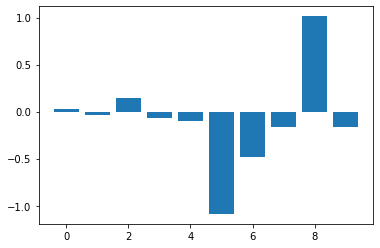

In [44]:
importance = lm.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

According to this model, poutcome ,job and education are three most important features.

# Predictive model 2: Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [46]:
rfc = RandomForestClassifier(n_estimators=30, max_depth=30)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, n_estimators=30)

In [47]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1896
           1       0.74      0.53      0.62       582

    accuracy                           0.85      2478
   macro avg       0.81      0.74      0.76      2478
weighted avg       0.84      0.85      0.84      2478



### Estimate the model performance using k fold cross validation

In [49]:
p = [X_train,X_train_new]
for i in p:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(RandomForestClassifier(),i,y_train,cv=kfold)
    msg ='%s: %f (%f)' % (RandomForestClassifier, cv_results.mean(),cv_results.std())
    print(msg)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>: 0.848936 (0.016649)
<class 'sklearn.ensemble._forest.RandomForestClassifier'>: 0.798406 (0.010844)


### As we can observe above
* CV score(for all features) :0.844
* CV score (for selected features) : 0.796

In [50]:
model_new = RandomForestClassifier(n_estimators =45,max_depth=10)
model_new.fit(X_train_new,y_train)

RandomForestClassifier(max_depth=10, n_estimators=45)

In [51]:
y1_pred = model_new.predict(X_test_new)

In [52]:
print('For selected features')
print(accuracy_score(y_test,y1_pred))

For selected features
0.8224374495560937


In [53]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1896
           1       0.68      0.45      0.54       582

    accuracy                           0.82      2478
   macro avg       0.77      0.69      0.72      2478
weighted avg       0.81      0.82      0.81      2478



In [54]:
feature_scores = pd.Series(model_new.feature_importances_, index=X_train_new.columns).sort_values(ascending=False)
feature_scores

poutcome     0.473095
housing      0.171276
job          0.111518
campaign     0.088310
education    0.043703
marital      0.042066
contact      0.027431
loan         0.025567
targeted     0.012380
default      0.004656
dtype: float64

In this model, poutcome,housing and job are three most important features.

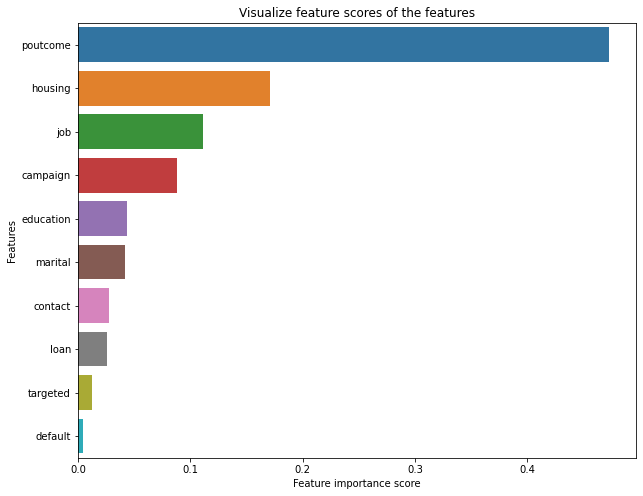

In [55]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

# Compare the performance of the Random Forest and the logistic model –
1. Evaluate both models on the test set

LR: 81.969170 (0.017829)
RF: 80.342213 (0.018971)


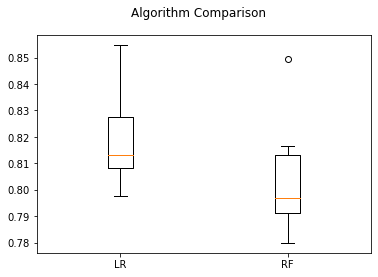

In [56]:
from sklearn import model_selection
seed=0
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=0)
    cv_results = model_selection.cross_val_score(model, i, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [57]:
print("RF Test Accuracy:",metrics.accuracy_score(y_test,y1_pred))
print("LR Test Accuracy:",metrics.accuracy_score(y_test,y_pred))

RF Test Accuracy: 0.8224374495560937
LR Test Accuracy: 0.8470540758676351


from this result, LOGISTIC REGRESSION has more accuracy. 

# Which metric did you choose and why?
we used accuracy and Cross val score Because it ensures that every observation from the original dataset has the chance of appearing in training and test set. This is one among the best approach if we have a limited input data.  

# Which model has better performance on the test set?  
Logistic has got better accuracy score campared to random foreset, hence we can say that it has better performance is an important model as it results in high AUC score

# Compare the feature importance from the different models – do they agree? Are the top features similar in both models?
According to LogisticRegression Model model, poutcome ,job and education are three most important features and poutcome,housing and job are three most important features In RandomFrest Model model.
on comparing both the model, we can say poutcome and job are the similar top feature.
education is second most important feature in LosgiticRegression model while in Random Forest, is least important.